In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
RAW_DATA_DIR = "../data/raw/"
RAW_DATA_TRAIN_FILE = "train.csv"
METADATA_FILE = "item_metadata.csv"

### Sample Data

In [3]:
sample_data_df = pd.read_csv(RAW_DATA_DIR + RAW_DATA_TRAIN_FILE, nrows=1000)

In [4]:
sample_data_df.head()

,user_id,session_id,timestamp,step,action_type,reference,platform,city,device,current_filters,impressions,prices
0,00RL8Z82B2Z1,aff3928535f48,1541037460,1,search for poi,Newtown,AU,"Sydney, Australia",mobile,NaN,NaN,NaN
1,00RL8Z82B2Z1,aff3928535f48,1541037522,2,interaction item image,666856,AU,"Sydney, Australia",mobile,NaN,NaN,NaN
2,00RL8Z82B2Z1,aff3928535f48,1541037522,3,interaction item image,666856,AU,"Sydney, Australia",mobile,NaN,NaN,NaN
3,00RL8Z82B2Z1,aff3928535f48,1541037532,4,interaction item image,666856,AU,"Sydney, Australia",mobile,NaN,NaN,NaN
4,00RL8Z82B2Z1,aff3928535f48,1541037532,5,interaction item image,109038,AU,"Sydney, Australia",mobile,NaN,NaN,NaN


In [5]:
sample_data_df.columns

Index(['user_id', 'session_id', 'timestamp', 'step', 'action_type',
       'reference', 'platform', 'city', 'device', 'current_filters',
       'impressions', 'prices'],
      dtype='object')

### Entire Data

In [6]:
data_df = pd.read_csv(RAW_DATA_DIR+RAW_DATA_TRAIN_FILE)

In [7]:
print("The shape of the data is: ", data_df.shape)

The shape of the data is:  (15932992, 12)


In [8]:
uniqueness_concerned_cols = ['user_id', 'session_id', 'action_type', 'platform', 'city', 'device']
data_df[uniqueness_concerned_cols].nunique()

user_id        730803
session_id     910683
action_type        10
platform           55
city            34752
device              3
dtype: int64

In [31]:
num_unique_users = 730803

### Interpretation and Ideas!
- The ratio of user id to session is close to 1. Which means that there are not many users with multiple sessions.
- This means that we can ignore the dependencies between 2 sessions even if they have the same user.
- Definitely in long run we can file tune to include a user's taste in the model as well to get some improvements.
- It would also be interesting to model how impressions impact the choice a user makes.
- Also, modelling the general taste of people for some cities can be an interesting thing to capture!

### Checking distribution of number of sessions for users.

In [15]:
counts_df = data_df.groupby('user_id')['session_id'].nunique()
counts_df = pd.DataFrame(counts_df)
counts_df.rename(columns={'session_id': 'num_sessions'}, inplace=True)
counts_df.reset_index(inplace=True, drop=False)

In [22]:
count_dist_df = pd.DataFrame(counts_df.groupby('num_sessions')['user_id'].nunique())
count_dist_df.rename(columns={'user_id': 'num_users'}, inplace=True)
count_dist_df.reset_index(inplace=True, drop=False)

In [34]:
count_dist_df['perc_users'] = 100*count_dist_df['num_users']/num_unique_users

In [35]:
count_dist_df

,num_sessions,num_users,perc_users
0,1,610601,83.552065
1,2,86211,11.796750
2,3,21180,2.898182
3,4,7158,0.979471
4,5,2828,0.386972
5,6,1315,0.179939
6,7,576,0.078817
7,8,361,0.049398
8,9,201,0.027504
9,10,128,0.017515


### Interpretation
95% of users have 2 or lesser sessions on the website!
This makes it clear that we should not be looking to model a particular user behavious, rather look at a generic user behaviour!

### Plotting it out
Ignoring the last 2 rows with only 1 user each!

In [36]:
sub_count_df = count_dist_df.head(n=24)

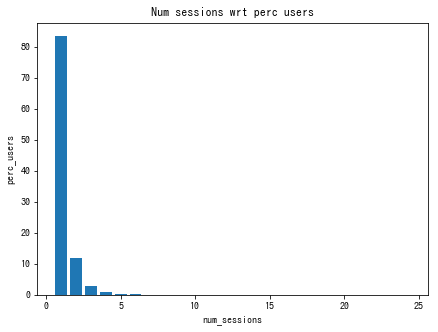

In [40]:
plt.figure(figsize=(7,5))
plt.bar(sub_count_df['num_sessions'], sub_count_df['perc_users'])
plt.xlabel('num_sessions')
plt.ylabel('perc_users')
plt.title('Num sessions wrt perc users')
plt.show()

### Checking distribution of users with city

In [41]:
counts_df = data_df.groupby('city')['user_id'].nunique()
counts_df = pd.DataFrame(counts_df)
counts_df.rename(columns={'user_id': 'num_users'}, inplace=True)
counts_df.reset_index(inplace=True, drop=False)

In [42]:
counts_df.head()

,city,num_users
0,"'s-Heerenberg, Netherlands",4
1,"'s-Hertogenbosch, Netherlands",78
2,"100 Mile House, Canada",10
3,"100 Mile Ranch, Canada",1
4,"10th of Ramadan City, Egypt",1


In [43]:
counts_df.sort_values('num_users', ascending=False, inplace=True)

In [44]:
counts_df.head(n=20)

,city,num_users
17101,"London, United Kingdom",13120
20732,"New York, USA",9158
30777,"Tokyo, Japan",9088
22523,"Paris, France",8876
16183,"Las Vegas, USA",7039
975,"Amsterdam, Netherlands",6647
13428,"Istanbul, Turkey",6306
25454,"Rome, Italy",5235
21934,"Osaka, Japan",5035
5224,"Cancun, Mexico",4972


In [45]:
counts_df.sort_values('num_users', ascending=True, inplace=True)

In [47]:
counts_df.head(n=20)

,city,num_users
14740,"Kinsarvik, Norway",1
33635,"Willington, USA",1
3483,"Birmenstorf, Switzerland",1
3464,"Binéfar, Spain",1
805,"Altenstadt, Germany",1
3481,"Birkenfeld, Germany",1
3467,"Biot, France",1
808,"Altinópolis, Brazil",1
33619,"Wilkesboro, USA",1
33634,"Willingshausen, Germany",1


### Interpretation and Ideas
There are a lot of cities with just 1 user ever searching for them!

It would be interesting to see how the model handles it.

One thing that could be done is to find city vectors someway, then use those city vectors to find the other closes cities to the city not searched heavily and then use the users and their behavious from those close cities as a proxy data for the model somehow!
